# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.



the purpose of the project is to figure out what parameters control the cost of a car.
i intend to preprocess the data and plot some graphs of price compared by vehicle age, odometer, color, condition, transmission type, and see the correlation


## Initialization

In [9]:
# Loading all the libraries
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport
import plotly.express as px
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns





### Load data

In [10]:
# Load the data file into a DataFrame
data = pd.read_csv('/datasets/vehicles_us.csv')
data = pd.DataFrame(data)
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal



In [11]:
# print the general/summary information about the DataFrame
#print(data.head())
print(data.info(),data.describe(include = object ), data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None              model  condition   fuel transmission   type paint_color  \
count        51525      51525  51525        51525  51525       42258   
unique         100          6      5            3     13          12   
top     ford f-150  excellent    gas    automatic    SUV       white   
freq          2796      24773  47288    

i'm noticing missing values in the model_year, cylinders, odometer, paint_color, paint_color and is_4wd columns, not completely symmetrical.

is4wd has the most missing values.
will look for correlation between missing values of different columns, and see the unique values, perhaps they can be filled based on the other columns.

strange artifacts - 
minimum of price is 1 dollar

minimum of model year is 1908 which i find hard to believe (perhaps its 1980)

minimum of days listed is 0 which also doesn't make sense.

In [12]:
data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [13]:
data_mis = data.isnull().sum().to_frame('missing_values')
data_mis['%'] = round(data.isnull().sum()/len(data),3)
data_mis.sort_values(by='%', ascending=False)

,missing_values,%
is_4wd,25953,0.504
paint_color,9267,0.180
odometer,7892,0.153
cylinders,5260,0.102
model_year,3619,0.070
price,0,0.000
model,0,0.000
condition,0,0.000
fuel,0,0.000
transmission,0,0.000


In [14]:
# print a sample of data
print(data[4:16])




    price  model_year                     model  condition  cylinders fuel  \
4   14900      2017.0              chrysler 200  excellent        4.0  gas   
5   14990      2014.0              chrysler 300  excellent        6.0  gas   
6   12990      2015.0              toyota camry  excellent        4.0  gas   
7   15990      2013.0               honda pilot  excellent        6.0  gas   
8   11500      2012.0               kia sorento  excellent        4.0  gas   
9    9200      2008.0               honda pilot  excellent        NaN  gas   
10  19500      2011.0  chevrolet silverado 1500  excellent        8.0  gas   
11   8990      2012.0              honda accord  excellent        4.0  gas   
12  18990      2012.0                  ram 1500  excellent        8.0  gas   
13  16500      2018.0            hyundai sonata  excellent        4.0  gas   
14  12990      2009.0                 gmc yukon  excellent        8.0  gas   
15  17990      2013.0                  ram 1500  excellent      

In [15]:
data['price'].unique()

array([ 9400, 25500,  5500, ...,  3636,  9249,  7455])


all the data types seem good enough, with object for strings and floats/integers for numbers. dates are strings.

### Conclusions and further steps



it would be hard to draw connections between the price and the data because the amount of missing values is huge, so i'll try to fill in as much as possible. perhaps a lot of the data is missing because the seller intended to profile the buyers  or just because the seller didn't provide the info for no reason or data gathering problems, maybe server problems.  i already see that is 4wd could be easily filled with 0 values for the NaN values, as there are otherwise no 0 values in this boolean column.

model year - i'll group by model and take the mean, that should give me a good estimate of the year where missing

odometer - i'll fill in with mean or median of values by model as the year make should be the same, so the odometers should be around the same value.

cylinders - i'll fill with median for model groups, as the cylinder number should be the same for same model.

paint color - it's a huge guessing game as to what the missing colors are. therefore i won't be filling those, instead putting 'unidentified'





## Treat missing values (if any)


for the model_year, we could group by model and take the average model year, use that to fill missing year.

In [27]:
#print(data[data['model_year'].isnull()].head(30))

print(data.groupby('model').median())
#data_grp_mdl = data.groupby('model')['model_year'].apply(round)

#data['model_year'] = data.groupby('model')['model_year'].apply(round).transform(lambda grp:grp.fillna(grp.mean()))
#print(data[data['model_year'].isnull()].head(30))

                     price  model_year  cylinders  odometer  is_4wd  \
model                                                                 
acura tl            5900.0      2007.0        6.0  141000.0     1.0   
bmw x5              9775.0      2010.0        6.0  108500.0     1.0   
buick enclave       9995.0      2012.0        6.0  113728.0     1.0   
cadillac escalade  13995.0      2009.0        8.0  129176.0     1.0   
chevrolet camaro   11961.0      2013.0        6.0   62655.5     1.0   
...                    ...         ...        ...       ...     ...   
toyota sienna       6495.0      2008.0        6.0  140715.0     1.0   
toyota tacoma      13995.0      2010.0        6.0  125000.0     1.0   
toyota tundra      13500.0      2009.0        8.0  120500.0     1.0   
volkswagen jetta    5900.0      2012.0        4.0  107000.0     1.0   
volkswagen passat   8688.0      2013.0        4.0   84905.0     1.0   

                   days_listed  
model                           
acura tl  

all the NaN values for 4wd replaced by 0 (as in False)

In [8]:
#treating is4w column
data['is_4wd']=data['is_4wd'].transform(lambda  x:x.fillna(0))
data[data['is_4wd'].isnull()].count()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

filling the odometer missing values - check if there are many outliers so i'll know to use the mean or median.


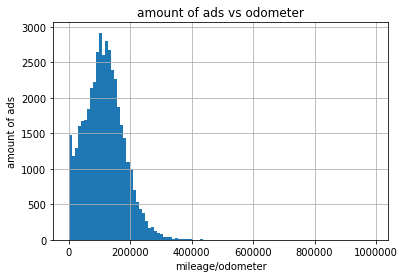

In [10]:
fig = data['odometer'].hist(bins=100)
fig.set_ylabel('amount of ads')
fig.set_xlabel('mileage/odometer')
fig.set_title('amount of ads vs odometer')
plt.show()

looks like there aren't too many outliers, therefore i'll fill in the missing values for odometer with means of model_year groups (same year make should have similar odometer values)

In [11]:
data['odometer'] = data.groupby('model_year')['odometer'].apply(round).transform(lambda grp:grp.fillna(grp.mean()))
data[data['odometer'].isnull()].count()
#data.head(30)
                                                                   

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

for the cylinder values i'll fill in using the median for the model  because the median value is most likely the mode, assuming the same model doesn't have different cylinder numbers.

In [12]:
data['cylinders'] = data.groupby('model')['cylinders'].transform(lambda grp:grp.fillna(grp.median()))
data_mis = data.isnull().sum().to_frame('missing_values')
data_mis['%'] = round(data.isnull().sum()/len(data),3)
data_mis.sort_values(by='%', ascending=False)

,missing_values,%
paint_color,9267,0.18
price,0,0.00
model_year,0,0.00
model,0,0.00
condition,0,0.00
cylinders,0,0.00
fuel,0,0.00
odometer,0,0.00
transmission,0,0.00
type,0,0.00


only paint_color values left, but there's no reasonable way to fill them without changing the distribution of the colors. i'll change NaN to 'unidentified'

In [13]:
data.loc[data['paint_color'].isnull(), 'paint_color'] = 'unidentified'
data_mis = data.isnull().sum().to_frame('missing_values')
data_mis['%'] = round(data.isnull().sum()/len(data),3)
data_mis.sort_values(by='%', ascending=False)

,missing_values,%
price,0,0.0
model_year,0,0.0
model,0,0.0
condition,0,0.0
cylinders,0,0.0
fuel,0,0.0
odometer,0,0.0
transmission,0,0.0
type,0,0.0
paint_color,0,0.0


## Fix data types

## Enrich data

In [14]:
# Add datetime values for when the ad was placed
data['date_posted'] = pd.to_datetime(
    data['date_posted'], format='%Y-%m-%d'
)
data['date_posted'].head()



0   2018-06-23
1   2018-10-19
2   2019-02-07
3   2019-03-22
4   2019-04-02
Name: date_posted, dtype: datetime64[ns]

In [15]:
# Add the vehicle's age when the ad was placed
data['vehicle_age'] = pd.DatetimeIndex(data['date_posted']).year - data['model_year']
data['vehicle_age'].head(30)



0      7.00000
1      8.24953
2      6.00000
3     16.00000
4      2.00000
5      4.00000
6      3.00000
7      6.00000
8      6.00000
9     11.00000
10     7.00000
11     7.00000
12     7.00000
13     1.00000
14    10.00000
15     5.00000
16     8.00000
17     4.00000
18     6.00000
19     0.00000
20     8.24953
21    11.00000
22    15.00000
23    14.00000
24     9.00000
25     1.00000
26     4.00000
27     3.00000
28     6.00000
29     9.00000
Name: vehicle_age, dtype: float64

In [16]:
# Add the vehicle's average mileage per year
#data['avg_mileage'] = (data['odometer'] / data['vehicle_age']).round()
#data['avg_mileage'].head(30)
data['odometer'].value_counts()

115553.461738    7892
0.000000          185
140000.000000     183
120000.000000     179
130000.000000     178
                 ... 
51595.000000        1
111381.000000       1
155940.000000       1
43402.000000        1
74063.000000        1
Name: odometer, Length: 17763, dtype: int64

notice we have 185 zeroes in the odometer which gives us "inf" avg_mileage but these rows will be removed before starting the analysis

In [17]:
# It might help to replace the condition values with something that can be manipulated more easily

def cond_cat(cond): #condition categorizer
    if cond == 'new':
        return 5
    if cond == 'like new':
        return 4
    if cond == 'excellent':
        return 3
    if cond == 'good':
        return 2
    if cond == 'fair':
        return 1
    else:
        return 0
    

print(data['condition'].head())
data['condition'] = data['condition'].transform(cond_cat)
data['condition'].head()


0         good
1         good
2     like new
3         fair
4    excellent
Name: condition, dtype: object


0    2
1    2
2    4
3    1
4    3
Name: condition, dtype: int64

## Check clean data

In [20]:
# print the general/summary information about the DataFrame
print(data.info(),
      data.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
price           51525 non-null int64
model_year      51525 non-null float64
model           51525 non-null object
condition       51525 non-null int64
cylinders       51525 non-null float64
fuel            51525 non-null object
odometer        51525 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null float64
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
vehicle_age     51525 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(3), object(5)
memory usage: 5.5+ MB
None                price    model_year     condition     cylinders       odometer  \
count   51525.000000  51525.000000  51525.000000  51525.000000   51525.000000   
mean    12132.464920   2009.750470      2.637535      6.121067  115553.461738   
std     10040.803015

In [21]:
# print a sample of data
data[400:420]



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age
400,22975,2012.00000,ram 2500,3,6.0,diesel,119546.000000,automatic,pickup,white,1.0,2019-01-24,34,7.00000
401,9500,2005.00000,jeep wrangler,3,6.0,gas,151000.000000,automatic,SUV,silver,1.0,2019-03-18,32,14.00000
402,20000,2016.00000,ram 1500,3,8.0,gas,115553.461738,automatic,truck,blue,0.0,2018-08-13,25,2.00000
403,5950,2015.00000,ford focus,4,4.0,gas,36000.000000,automatic,hatchback,silver,0.0,2018-08-23,110,3.00000
404,2700,2000.00000,ford mustang,2,6.0,gas,140000.000000,manual,coupe,red,0.0,2019-02-15,16,19.00000
405,1,2014.00000,chevrolet camaro,3,6.0,gas,71310.000000,automatic,coupe,unidentified,0.0,2018-07-14,29,4.00000
406,288,2018.00000,nissan altima,3,4.0,gas,40277.000000,automatic,sedan,silver,0.0,2018-10-19,37,0.00000
407,11500,2009.00000,chevrolet silverado 2500hd,2,8.0,gas,170000.000000,automatic,truck,unidentified,1.0,2018-08-05,27,9.00000
408,700,2000.00000,ford focus,1,4.0,gas,221000.000000,manual,sedan,blue,0.0,2018-05-18,38,18.00000
409,5725,2004.00000,toyota corolla,2,4.0,gas,103889.000000,automatic,sedan,silver,0.0,2018-08-06,77,14.00000


## Study core parameters


The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

In [22]:
def distribution_IQR(parameter):
    print('The histogram of: {}'.format(parameter))
    data[parameter].hist()
    plt.show()
    if data[parameter].mean()>data[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(data[parameter].describe())
    Q1 = data[parameter].quantile(0.25)
    Q3 = data[parameter].quantile(0.75)
    IQR = Q3 - Q1
    min_iqr=Q1-1.5*IQR
    max_iqr=Q3+1.5*IQR
    print('---------------------------------------')
    print('min border:',min_iqr)
    print('max border:',max_iqr)
    print('---------------------------------------')
    if min_iqr<0:
        print('The outliers are considered to be values above',max_iqr)
        print('We have',len(data[data[parameter]>max_iqr]),"values that we can consider outliers")
    else:
        print('The outliers are considered to be values below',min_iqr, "and above",max_iqr)
        print('We have',len(data[(data[parameter]<min_iqr)|(data[parameter]>max_iqr)]),"values that we can consider outliers")
        
def distribution_percentile(parameter):
    print('The histogram of: {}'.format(parameter))
    fig = data[parameter].hist(bins = 100)
    fig.set_ylabel('amount')
    fig.set_xlabel(parameter)
    fig.set_title(f'amount vs {parameter}')
    plt.show()
    if data[parameter].mean()>data[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(data[parameter].describe())
    ninety_five = np.percentile(data[parameter], 95)
    five = np.percentile(data[parameter], 5)
    print('---------------------------------------')
    print('min border:',five)
    print('max border:',ninety_five)
    print('---------------------------------------')
    print('The outliers are considered to be values below',five, "and above",ninety_five)
    print('We have',len(data[(data[parameter]<five)|(data[parameter]>ninety_five)]),"values that we can consider outliers")

The histogram of: price


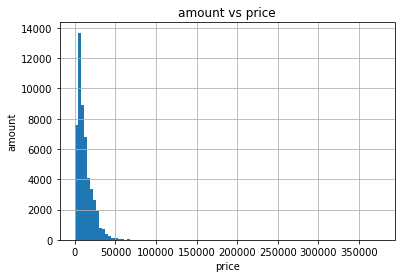

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
min border: 1950.0
max border: 30300.0
---------------------------------------
The outliers are considered to be values below 1950.0 and above 30300.0
We have 5141 values that we can consider outliers
The histogram of: vehicle_age


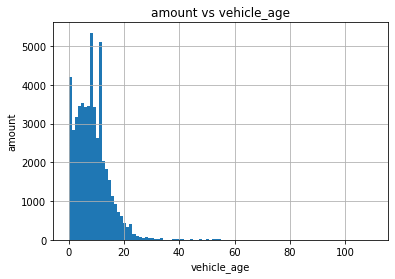

The distribution is skewed to the right
---------------------------------------
Statistics on: vehicle_age
count    51525.000000
mean         8.556993
std          6.071387
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64
---------------------------------------
min border: 1.0
max border: 19.0
---------------------------------------
The outliers are considered to be values below 1.0 and above 19.0
We have 4198 values that we can consider outliers
The histogram of: odometer


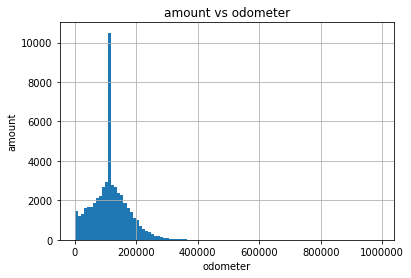

The distribution is skewed to the left
---------------------------------------
Statistics on: odometer
count     51525.000000
mean     115553.461738
std       59902.205520
min           0.000000
25%       79181.000000
50%      115553.461738
75%      146541.000000
max      990000.000000
Name: odometer, dtype: float64
---------------------------------------
min border: 19000.0
max border: 216500.0
---------------------------------------
The outliers are considered to be values below 19000.0 and above 216500.0
We have 5136 values that we can consider outliers
The histogram of: cylinders


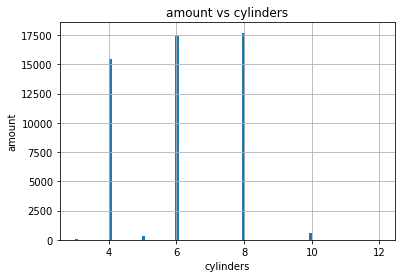

The distribution is skewed to the right
---------------------------------------
Statistics on: cylinders
count    51525.000000
mean         6.121067
std          1.657457
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
---------------------------------------
min border: 4.0
max border: 8.0
---------------------------------------
The outliers are considered to be values below 4.0 and above 8.0
We have 585 values that we can consider outliers
The histogram of: condition


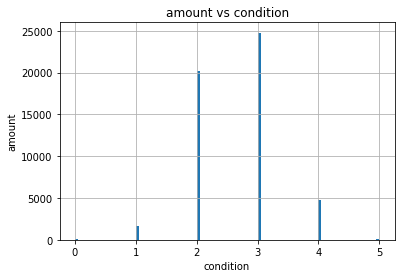

The distribution is skewed to the left
---------------------------------------
Statistics on: condition
count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64
---------------------------------------
min border: 2.0
max border: 4.0
---------------------------------------
The outliers are considered to be values below 2.0 and above 4.0
We have 1865 values that we can consider outliers


In [24]:
#
for column in ['price','vehicle_age','odometer','cylinders','condition']:
    distribution_percentile(column)






## Study and treat outliers



Determine the upper and lower limits for outliers


Price
upper limit 30300, lower limit 1950

The vehicle's age when the ad was placed
upper limit 19, lower limit 1

Mileage
lower limit 19000 upper limit 216500

Number of cylinders won't consider outliers since the cylinder number is a feature
of the car, not a datapoint which can be miscalculated

Condition upper limit 4 lower limit 2



In [26]:
# Store data without outliers in a separate DataFrame
data_good = data.query("(1950<price<30300) and (1<vehicle_age<19) and (19000<odometer<216500) and (2<=condition<=4)")





## Study core parameters without outliers

In [27]:
def distribution_percentile_filtered(parameter):
    print('The histogram of: {}'.format(parameter))
    data_good[parameter].hist(bins = 100)
    fig = data_good[parameter].hist(bins = 100)
    fig.set_ylabel('amount')
    fig.set_xlabel(parameter)
    fig.set_title(f'amount vs {parameter}')
    plt.show()
    if data_good[parameter].mean()>data_good[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(data_good[parameter].describe())
    ninety_five = np.percentile(data_good[parameter], 95)
    five = np.percentile(data_good[parameter], 5)
    print('---------------------------------------')
    #print('min border:',five)
    #print('max border:',ninety_five)
    #print('---------------------------------------')
    #print('The outliers are considered to be values below',five, "and above",ninety_five)
    #print('We have',len(data_good[(data_good[parameter]<five)|(data_good[parameter]>ninety_five)]),"values that we can consider outliers")

The histogram of: price


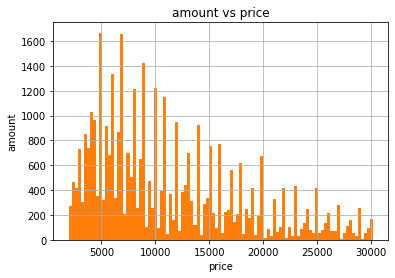

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count    37916.000000
mean     11228.867180
std       6826.426357
min       1975.000000
25%       5900.000000
50%       9350.000000
75%      15250.000000
max      30195.000000
Name: price, dtype: float64
---------------------------------------
The histogram of: vehicle_age


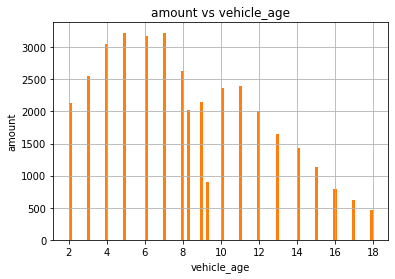

The distribution is skewed to the right
---------------------------------------
Statistics on: vehicle_age
count    37916.000000
mean         8.210871
std          3.962955
min          2.000000
25%          5.000000
50%          8.000000
75%         11.000000
max         18.000000
Name: vehicle_age, dtype: float64
---------------------------------------
The histogram of: odometer


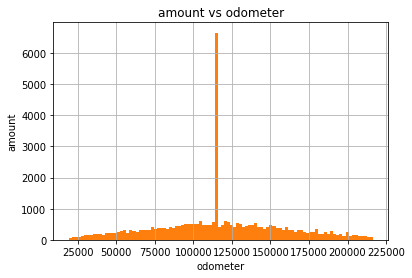

The distribution is skewed to the right
---------------------------------------
Statistics on: odometer
count     37916.000000
mean     117026.905735
std       41239.183544
min       19068.000000
25%       92000.000000
50%      115553.461738
75%      142949.000000
max      216450.000000
Name: odometer, dtype: float64
---------------------------------------
The histogram of: cylinders


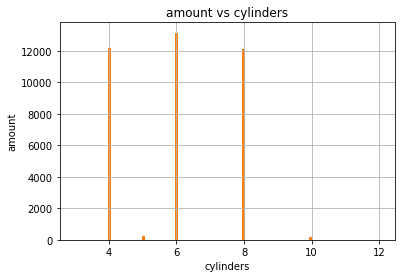

The distribution is skewed to the right
---------------------------------------
Statistics on: cylinders
count    37916.000000
mean         6.007490
std          1.628733
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
---------------------------------------
The histogram of: condition


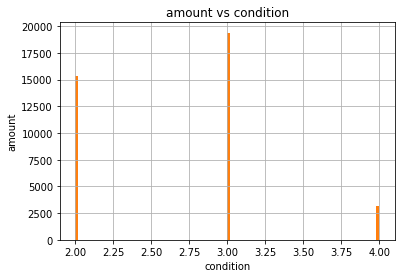

The distribution is skewed to the left
---------------------------------------
Statistics on: condition
count    37916.000000
mean         2.678553
std          0.620631
min          2.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: condition, dtype: float64
---------------------------------------


In [28]:
for column in ['price','vehicle_age','odometer','cylinders','condition']:
    distribution_percentile_filtered(column)

the histograms now look actually like bell curves, which gives the impression of a good distribution. except the cylinder and condition histograms, which have less spread now

## Ads lifetime



The histogram of: days_listed


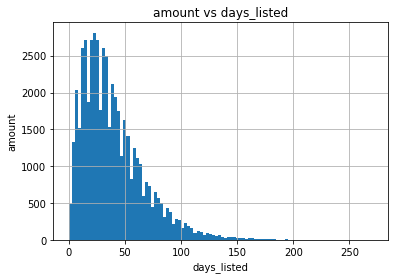

The distribution is skewed to the right
---------------------------------------
Statistics on: days_listed
count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64
---------------------------------------
min border: 7.0
max border: 94.0
---------------------------------------
The outliers are considered to be values below 7.0 and above 94.0
We have 4917 values that we can consider outliers


In [29]:
distribution_percentile('days_listed')

below a week old, we can consider ads to be short-lived. above about 90 days we can consider them up for abnormally long.
a typical ad is up for about a month.

## Average price per each type of vehicle

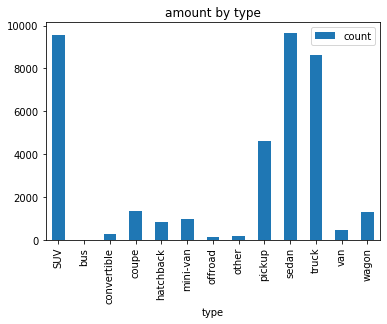

In [34]:
#data['type'].value_counts()
#print(vehicle_type)

vehicle_type=data_good.groupby(['type'])['price'].agg(['count','mean']).reset_index()
vehicle_type.plot(x='type', y='count', kind='bar', title='amount by type')



## Price factors

removing categorical variables with less than 50 ads and plotting scatter plots, alpha 0.03 so we understand the graph better.

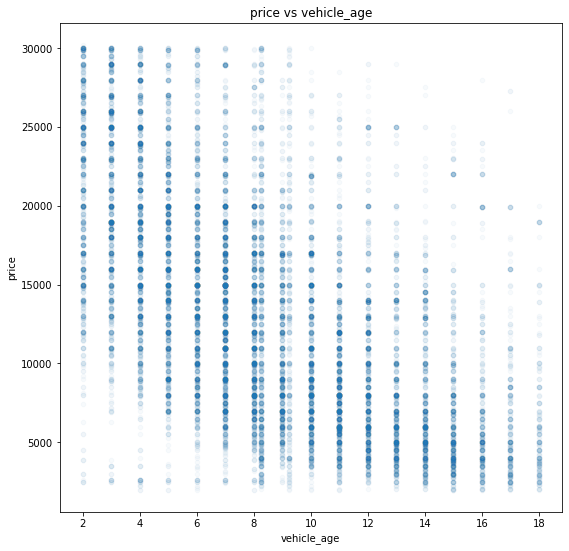

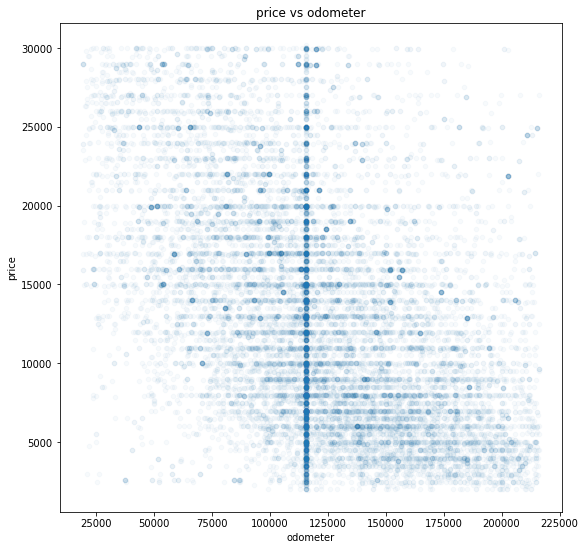

In [35]:
type_data=data_good.query("(type == 'SUV') or (type == 'truck')")
type_data['paint_color'].value_counts()
type_data=type_data.loc[(type_data['paint_color'] != 'yellow') & (type_data['paint_color'] != 'purple')]
type_data['paint_color'].value_counts()


for column in ['vehicle_age','odometer']:
    type_data.plot(x=column, y='price', kind='scatter', figsize=(9,9), alpha = 0.03, title=f'price vs {column}')
    






/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



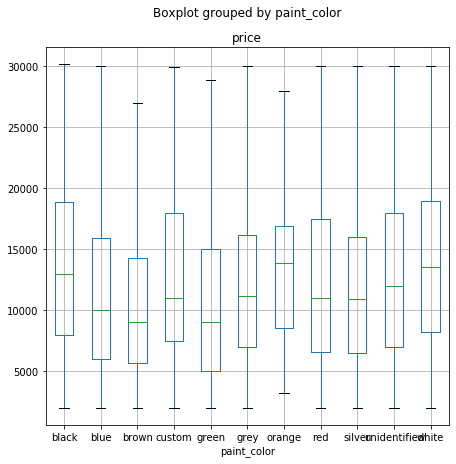

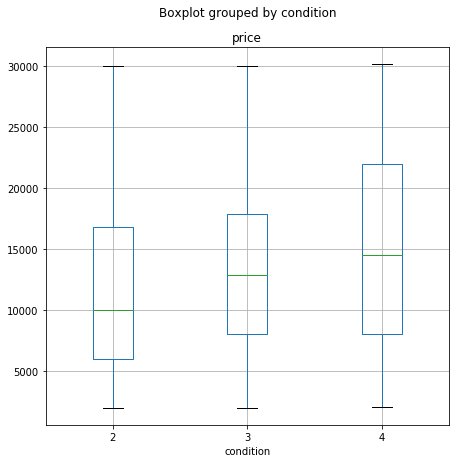

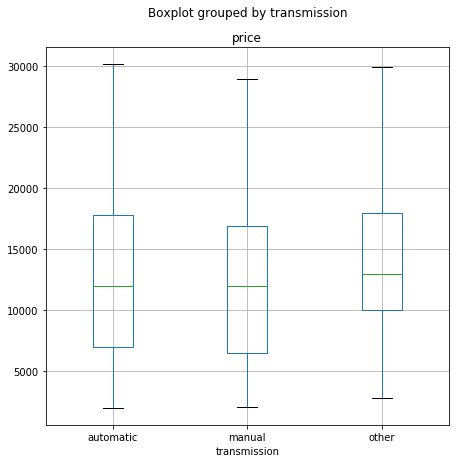

In [32]:
type_data.boxplot(column='price',by='paint_color', showfliers=False, figsize=(7,7))
type_data.boxplot(column='price',by='condition', showfliers=False, figsize=(7,7))
type_data.boxplot(column='price',by='transmission', showfliers=False, figsize=(7,7))

In [39]:
print(type_data['condition'].value_counts(),
      type_data['paint_color'].value_counts(),
      type_data['transmission'].value_counts())
#making sure all the categories have 50 ads at least.

3    9181
2    7468
4    1425
Name: condition, dtype: int64 white           4104
unidentified    3208
black           2704
silver          2020
grey            1625
blue            1477
red             1431
brown            472
custom           471
green            449
orange           113
Name: paint_color, dtype: int64 automatic    17305
manual         616
other          153
Name: transmission, dtype: int64


boxplot grouped by paint_color - top colors: black, custom, white. the boxes are higher, which means they typically advertise as more expensive, although orange has a high median price (well, some people REALLY like orange), also note green has a high upper whisker which means someone was selling at that value of 30000 bucks.

boxplot grouped by condition - obviously as the condition worsens (from right to left) the typical prices also fall, so the boxes seem to go down.

boxplot grouped by transmission - seems there's only a slight difference between manual and automatic, the box for automatic is slightly higher. i can understand that some people feel comfortable enough with a manual transmission that they're willing to pay almost as much as they're willing for automatic. although for the automatic it's possible to ask for a higher price as the demand is higher (more people struggly with manual, so they just learn automatic) the number of manual transmission ads is also practically insignificant compared to the automatic.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef389a65d0>,
      dtype=object)

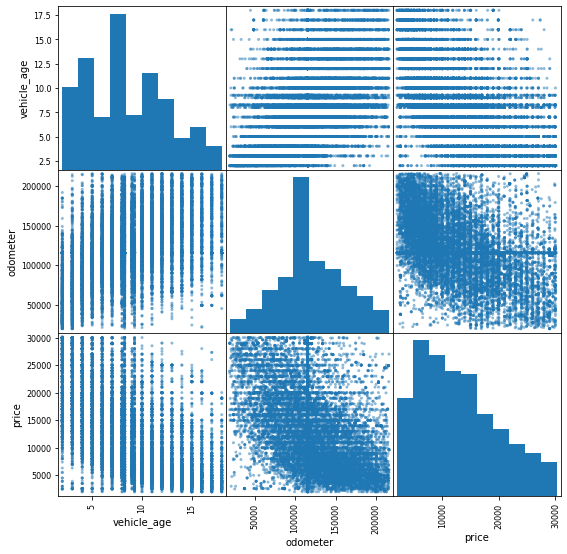

In [40]:

for_scatter = type_data[['vehicle_age','odometer','price']]
pd.plotting.scatter_matrix(for_scatter, figsize=(9,9))

In [41]:
for_scatter.corr()

,vehicle_age,odometer,price
vehicle_age,1.000000,0.431487,-0.575192
odometer,0.431487,1.000000,-0.456400
price,-0.575192,-0.456400,1.000000


we see from the graphs and the correlation matrix, price and vehicle age correlate the strongest, as the correlation coefficient is furthest from zero (closest to -1)
and it makes sense because vehicles have higher risk of malfunction as they age.

## General conclusion

we had missing values in the model year, cylinders, odometer, pain color and 'is_4wd' columns not matching each other.
as said above, i believe a huge amount of the data was missing not because of technical issues of data gathering, but because the sellers omit the information as part of the selling strategy.
some of the values like number of cylinders could be filled automatically with information about the car model, so in general we could keep a dictionary with all the important attributes to be used.

the color missing values i'm guessing were missing because the ads had photos so there wasn't any need
to state the color. either that or some technical issue.

we had strange artifacts like price of 1 dollar, which could be considered
outliers and were omitted in the filtering phase
the artifacts could be attributed to data gathering mistakes, or even human mistakes
in the ads themselves. 

we saw from the graphs and the correlation matrix, price and vehicle age correlate the strongest, second came the odometer, which makes sense because the older and more worn out the vehicle, the less a customer is willing to pay for it.

to the manager/tech team - in regards to the unusual artifacts, i'd recommend adding some filters to the system like price minimum of 200$, year minimum of 1985 (old vehicles don't really help the analysis, and they could be regular old vehicles or rare items, so the price could go either way)